# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = [32, 32]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = [32, 32]
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Training set = 39209


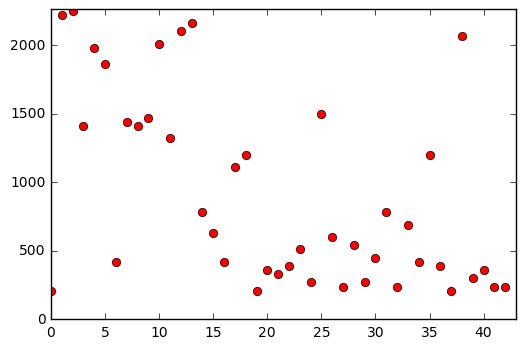

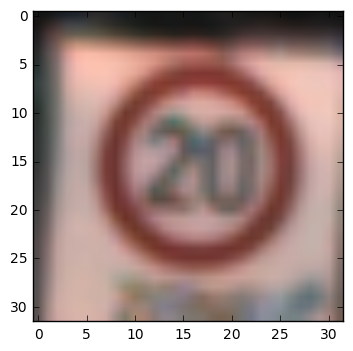

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import collections
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

quantities = [(y_train == x).sum() for x in range(0, n_classes) ]

print("Training set =", sum(quantities))


plt.show()

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(range(0, n_classes), quantities, 'ro')
ax1.axis([0, n_classes, 0, max(quantities) + 10])

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
imgplot = ax2.imshow(X_train[100])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import cv2

def signSpecifiedClahe(img):
    blue = img[:, :, 0]
    red = img[:, :, 2]
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    claheObj = cv2.createCLAHE(clipLimit = 2.0, tileGridSize=(3, 3))
    
    clahe     = claheObj.apply(gray_image)
    claheRed  = claheObj.apply(red)
    claheBlue = claheObj.apply(blue)
  
    return np.stack((claheBlue, claheRed, clahe),axis=2)

def applyClahe(array):
    temp = np.zeros((len(array), 32, 32, 3),  dtype=np.uint8)
    for i in range(len(array)):
        temp[i, :, :, :] = signSpecifiedClahe(array[i, :, :, :])
    return temp

def generateOneHot(label):
    hot = np.zeros((n_classes), dtype = np.uint8)
    hot[label] = 1
    return hot

def applyOneHot(array):
    temp_hot = np.zeros((len(array), n_classes), dtype=np.uint8)
    for i in range(len(array)):
        temp_hot[i, :] = generateOneHot(array[i])
    return temp_hot

X_train = applyClahe(X_train)
X_test = applyClahe(X_test)

y_train = applyOneHot(y_train)
y_test = applyOneHot(y_test)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
    I'm using CLAHE preprocessing technic based on the info from "A Committee of Neural Networks for Traffic Sign Classification" paper by Dan Ciresan, Ueli Meier, Jonathan Masci and Jurgen Schmidhuber. Then I experimented with mixing different CLAHE transforms and got to the conclusion that Grayscaled CLAHE, Red CLAHE and Blue CLAHE had showed best results for training validations. I suppose this is because of the color of traffic signs: in the dataset most of the signs either blue or red with white. 
    So I've choosen that technique because I've tried that approach and results were better then without the preprocessing (I also tried approaches with grayscale and tried to think of approach somewhat similar to the project one filtering of the image).

In [6]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import numpy as np

def generateSplitting(X, y):
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=0)
    return X_train, X_validation, y_train, y_validation

def batches(X, y, batch_size): 
    division = int((len(X) / batch_size) + 1)
    for k in range(division):
        a = k * batch_size
        b = a + batch_size
        yield (X[a:b], y[a:b])

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
    Well, regarding testing data - it was taken from the test dataset, I hadn't done anything else with the test data. When it comes to the training and validation data - I've used the method from the lectures "train_test_split" to randomly generate splitted data with 20% of the data - as validation set.
    *Thing to improve 1*: It would be nice to generate more data from the current training set with some image or color transformations. It should help our deep network to understand even corrupted data in the traffic flow (because traffic sign could be damaged, something could be drawn on it's surface or it's color could be different in different weather conditions).
    *Thing to improve 2*: Also in the dataset there are not equal quantity of images for each class, that means that some images would be trained much 'better' (probabilitstically speaking), then the others. It would have been great to equalize the number of images for each class (e.g. we can add more images generated from the current ones with some rotations or translations).

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 100
BATCH_SIZE = 128
rate = 0.0001
MAX_VALUE = 255

drop = tf.placeholder(tf.float32)
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
normalaized_x = tf.div(tf.subtract(x, int(MAX_VALUE / 2)), MAX_VALUE)
y = tf.placeholder(tf.float32, (None, 43))

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W, b):
    return tf.nn.bias_add(tf.nn.conv2d(x, W, strides = [1, 1, 1, 1], padding = 'SAME'), b)

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')
 
def VGG(x, drop):
    prepShape = tf.reshape(x, [-1, 32, 32, 3])
    prepConv  = conv2d(prepShape, weight_variable(shape = (1, 1, 3, 3)), bias_variable([3]))
    prepElu = tf.nn.elu(prepConv)
    layer1  = conv2d(prepElu, weight_variable(shape = (3, 3, 3, 32)), bias_variable([32]))
    layer2  = tf.nn.elu(layer1)
    layer3  = conv2d(layer2, weight_variable(shape = (3, 3, 32, 32)), bias_variable([32]))
    layer4  = tf.nn.elu(layer3)
    layer5  = max_pool_2x2(layer4)
    layer6  = conv2d(layer5, weight_variable(shape = (3, 3, 32, 64)), bias_variable([64]))
    layer7  = tf.nn.elu(layer6)
    layer8  = conv2d(layer7, weight_variable(shape = (3, 3, 64, 64)), bias_variable([64]))
    layer9  = tf.nn.elu(layer8)
    layer10 = max_pool_2x2(layer9)
    drop1   = tf.nn.dropout(layer10, drop)
    layer11 = conv2d(drop1, weight_variable(shape = (3, 3, 64, 128)), bias_variable([128]))
    layer12 = tf.nn.elu(layer11)
    layer13 = conv2d(layer12, weight_variable(shape = (3, 3, 128, 128)), bias_variable([128]))
    layer14 = tf.nn.elu(layer13)
    layer15 = max_pool_2x2(layer14)
    layer16 = flatten(layer15)
    layer17 = tf.matmul(layer16, weight_variable(shape = (2048, 100))) + bias_variable([100])
    layer18 = tf.nn.elu(layer17)
    layer19 = tf.matmul(layer18, weight_variable(shape = (100, 100))) + bias_variable([100])
    layer20 = tf.nn.elu(layer19)
    drop2   = tf.nn.dropout(layer20, drop)
    layer21 = tf.matmul(drop2, weight_variable(shape = (100, 43))) + bias_variable([43])
    return layer21

logits = VGG(normalaized_x, drop)

cross_entropy      = tf.nn.softmax_cross_entropy_with_logits(logits, y)
loss_operation     = tf.reduce_mean(cross_entropy)
optimizer          = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

prediction         = tf.argmax(logits, 1)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_validation, y_validation):
    validation_accuracy = []
    for (X_batched, y_batched) in batches(X_validation, y_validation, BATCH_SIZE):
        temp_accuracy = sess.run(accuracy_operation, feed_dict={x: X_batched, y: y_batched, drop: 1.0})
        validation_accuracy.append(temp_accuracy)
    return np.mean(validation_accuracy)


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
My architecture is based on the "Traffic sign classification with deep convolutional neural networks" 
paper by JACOPO CREDI.

The total layer of the model is 22 layers: 7 convolutional layers, 3 pooling layers, 9 nonlinear layers and 3 fully connected layers. For nonlinear layers I've used the *tf.nn.elu()* functions as they tend to be better then RELUs during my experiments.

L1:  Convolutional. To choose the best CLAHE filter. (1x1, 3 maps, padding 1)
L2:  Nonlinearity (ELU).
L3:  Convolutional. (3x3, 32 maps, padding 1)
L4:  Nonlinearity (ELU).
L5:  Convolutional. (3x3, 32 maps, padding 1)
L6:  Nonlinearity (ELU).
L7:  Pooling. (2x2, stride 2)
L8:  Convolutional. (3x3, 64 maps, padding 1)
L9: Nonlinearity (ELU).
L10: Convolutional. (3x3, 64 maps, padding 1)
L11: Nonlinearity (ELU).
L12: Pooling. (2x2, stride 2)
L13: Convolutional. (3x3, 128 maps, padding 1)
L14: Nonlinearity (ELU).
L15: Convolutional. (3x3, 128 maps, padding 1)
L16: Nonlinearity (ELU).
L17: Pooling. (2x2, stride 2)
L18: Fully Connected. (2048, 100)
L19: Nonlinearity (ELU).
L20: Fully Connected. (100, 100)
L21: Nonlinearity (ELU).
L22: Fully Connected. (100, 43)

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    print(EPOCHS)
    print()
    
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    
    for i in range(EPOCHS):
        X_training, X_validate, y_training, y_validate = generateSplitting(X_train, y_train)
        print("Training...")
        print("EPOCH {} ...".format(i + 1))
        for (X_trn, y_trn) in batches(X_training, y_training, BATCH_SIZE):
            sess.run(training_operation, feed_dict={x: X_trn, y: y_trn, drop: 0.5})
            
        validation_accuracy = evaluate(X_validate, y_validate)
        
        print("Validation Accuracy = {:.10f}".format(validation_accuracy))
        print()
        if (i % 5 == 0 and i > 1):
            saver.save(sess, 'lenet2')
            print('Trained Model Saved Temp.')
        
    saver.save(sess, 'lenet2')
    print("Model saved END")

100

Training...
EPOCH 1 ...
Validation Accuracy = 0.0686151013

Training...
EPOCH 2 ...
Validation Accuracy = 0.1636622399

Training...
EPOCH 3 ...
Validation Accuracy = 0.2825174928

Training...
EPOCH 4 ...
Validation Accuracy = 0.4184876084

Training...
EPOCH 5 ...
Validation Accuracy = 0.5051589012

Training...
EPOCH 6 ...
Validation Accuracy = 0.6119618416

Trained Model Saved Temp.
Training...
EPOCH 7 ...
Validation Accuracy = 0.7052745223

Training...
EPOCH 8 ...
Validation Accuracy = 0.7745196819

Training...
EPOCH 9 ...
Validation Accuracy = 0.8308898211

Training...
EPOCH 10 ...
Validation Accuracy = 0.8628587127

Training...
EPOCH 11 ...
Validation Accuracy = 0.8932637572

Trained Model Saved Temp.
Training...
EPOCH 12 ...
Validation Accuracy = 0.9104972482

Training...
EPOCH 13 ...
Validation Accuracy = 0.9315406084

Training...
EPOCH 14 ...
Validation Accuracy = 0.9416212440

Training...
EPOCH 15 ...
Validation Accuracy = 0.9533103108

Training...
EPOCH 16 ...
Validation A

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
I've used Adam optimizer
Learning rate set to 0.0001 (In the article above optimal learning rate was 0.00001, but for me 0.0001 showed the best results)
128 batches as in the LeNet Lab
100 training epochs, but actually 40 is already enough
mu = 0, stddev = 0.1 (also tried with 0.01, but this value has provided the best result)
bias = 0.1, to get rid of the 'dead' neurons with 0s.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
    Well, I've started with from the lecture implemented LeNet approach to this problem, but I wasn't able to get the validation probability higher then 0.8XX, then I decided to try something new and searched the web to found out papers on that topic - and I've found "Traffic sign classification with deep convolutional neural networks" paper by JACOPO CREDI. I've read the article and decided that results were really nice (it stated to behave really good) and decided to implement architecture provided in the article. 
    As the next step I've thought about preprocessing images as well, and firstly I've been thinking about translation to UYV space and making global and local normalization of Y as stated in the article suggested in the project, but then I've found the other way to do that with CLAHE (discussed in the Q1). 
    Then I've modified the architecture with the new layer to select best CLAHE filter - it was my first move out of the article suggestest architecture.
    Next thing I've though of was overfitting: I've decided to add the tf dropout into the selected architecture to prevent overfitting of data.
    As soon as I've implemented both preprocessing with CLAHE and the my new architecture - I needed to select the parameters, so I've started to experiment with different batch sized, stddevs, drop rates, learning rates, etc. I've tried learning rate suggested in the article, but it hasn't wroked really good for me, that's why I've decided to go with a faster learning rate and also I've tried suggested 64 batch size - for me 128 worked better.
    As a result I got my current solution, tried it with 100 epochs, but actually around 40 epochs was enough to get quite high validation accuracy.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.



#X_test, y_test = test['features'], test['labels']
#X_test = applyClahe(X_test)
#y_test = applyOneHot(y_test)
#tf.reset_default_graph()

with tf.Session() as sess:
    #sess.run(tf.initialize_all_variables())
    loader = tf.train.import_meta_graph('lenet2.meta')
    #saver.restore(sess, 'lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    #print(sess.run(tf.all_variables()))
    #all_vars = tf.trainable_variables()

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    #50 epochs - Test Accuracy = 0.958

In [ ]:
%matplotlib inline

signs_num = 16

XX = np.zeros((signs_num, 32, 32, 3), dtype=np.uint8)
fig = plt.figure()
for i in range(signs_num):
    name = 'custom_signs/' + str(i) + '.png'
    image = cv2.imread(name, 1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    XX[i, :, :, :] = image
    sp = fig.add_subplot(4, 4, i + 1)
    sp.axes.get_xaxis().set_visible(False)
    sp.axes.get_yaxis().set_visible(False)
    sp.imshow(image)
fig.show()

XXX = applyClahe(XX)
yyy = applyOneHot(yy)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
I've selected images that can be found in Finland. The most tricky I think the one the moose image, also the same moose image but having some angle. Next I find it quite difficult - the no entry sign with drawings on it and also no way sign with some deffects. Next ones are Dangerous curves signs and Double curve, that look differently. In addition the color of the Finnish signs is mainly yellow woth red or blue. (not white).

Thing to improve: For that kind of signs it would be helpful also to add a yellow CLAHE filter (but that would also additionally increase the number of params to 4 channels)

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

fig = plt.figure()
sp.axes.get_xaxis().set_visible(False)
sp.axes.get_yaxis().set_visible(False)
image1=fig.add_subplot(1,5,1)
image1.imshow(XX[1,:,:,:])
image2=fig.add_subplot(1,5,2)
image2.imshow(XX[10,:,:,:])
image3=fig.add_subplot(1,5,3)
image3.imshow(XX[5,:,:,:])
image4=fig.add_subplot(1,5,4)
image4.imshow(XX[8,:,:,:])
image5=fig.add_subplot(1,5,5)
image5.imshow(XX[9,:,:,:])
fig.show()


with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet2.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    predictions = sess.run(prediction, feed_dict={x: XXX, y: yyy, drop: 1.0})
    sftmax = sess.run(tf.nn.softmax(logits), feed_dict={x: XXX, y: yyy, drop: 1.0})
    
print ('Predictions:')
print (predictions)
print ('Correct labels:')
print ('[13 31 31 25 15 21 21 38 15 17 19 20 40 26 33 NO]')

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
plt.plot(sftmax[0])
import tensorflow as tf
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet2.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    topk = sess.run(tf.nn.top_k((tf.constant(sftmax[0])), k=5))
print (topk)

plt.plot(sftmax[8])
import tensorflow as tf
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet2.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    topk = sess.run(tf.nn.top_k((tf.constant(sftmax[8])), k=3))
print (topk)

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
reader = tf.train.NewCheckpointReader("/home/valtgun/CarND/CarND-Traffic-Signs/model_3d_Fin.ckpt")
reader.get_variable_to_shape_map()

tens = reader.get_tensor("Variable_2")
#print (tens.shape)
#print (tens)
imgTest = tens[:,:,0,0]
plt.imshow(imgTest, cmap='gray')